In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

In [ ]:

print(df)

### Split the data  ###

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0


from sklearn.model_selection import train_test_split

feature_data = df.drop(columns = ['Goal']).copy()
target_data = np.array(df['Goal'])

#splitting the training data from the test/validation data
X_train, X_val_test, y_train, y_val_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=1)

#now split the test/validation data equally since both are 15%
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=1)

# Standardization of dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_val)
X_val_std=scaler.transform(X_val)

scaler = StandardScaler()
scaler.fit(X_test)
X_test_std=scaler.transform(X_test)

#insert column of 1
#training dataset
new_column= np.ones(X_train_std.shape[0])
X_train_std= np.c_[new_column, X_train_std]

#test dataset
new_column= np.ones(X_test_std.shape[0])
X_test_std= np.c_[new_column, X_test_std]

#val dataset
new_column= np.ones(X_val_std.shape[0])
X_val_std= np.c_[new_column, X_val_std]


       inputs ClimbRate  Sgz     P     Q  ...  DiffSeTime14  Alpha     Se    Goal
0                   -17   -6 -0.03  0.14  ...           0.0    0.6  0.021 -0.0008
1                  -791   15 -0.28 -0.34  ...           0.0    0.4  0.013 -0.0009
2                   -46   48 -0.42  0.07  ...           0.0    0.5  0.019 -0.0005
3                   496   -5 -0.21 -0.04  ...           0.0    0.5  0.017 -0.0005
4                  -124   16 -0.02  0.05  ...           0.0    0.5  0.018 -0.0006
...                 ...  ...   ...   ...  ...           ...    ...    ...     ...
13745               -53  -13 -0.07  0.02  ...           0.0    0.5  0.019 -0.0007
13746                 1    4 -0.11 -0.07  ...           0.0    0.5  0.016 -0.0004
13747               425  -14  0.40  0.07  ...           0.0    0.9  0.032 -0.0015
13748               102  -10 -0.19  0.08  ...           0.0    1.4  0.051 -0.0015
13749              -165   52  0.08  0.42  ...           0.0    0.9  0.034 -0.0018

[13750 rows x 4

In [ ]:
### YOUR CODE HERE ###
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error

def rmse(y_pred, y):
    return np.sqrt(mean_squared_error(y_pred, y))

# implementing the direct solution solution
W = np.dot(inv(np.dot(X_train_std.T, X_train_std)), np.dot(X_train_std.T, y_train))

# prediction on training
y_pred_train = np.dot(X_train_std, W)

# prediction on val
y_pred_val = np.dot(X_val_std, W)

# reporting root squared error

# on training set
direct_solution_train_rmse = rmse(y_pred_train, y_train)
print('RMSE on training dataset: ', direct_solution_train_rmse)

# on val set
direct_solution_val_rmse = rmse(y_pred_val, y_val)
print('RMSE on validation dataset: ', direct_solution_val_rmse)

RMSE on training dataset:  0.00017707758079743764
RMSE on validation dataset:  0.00017443831573583636


--- Total Training Time: 10.540667057037354 (s) ---


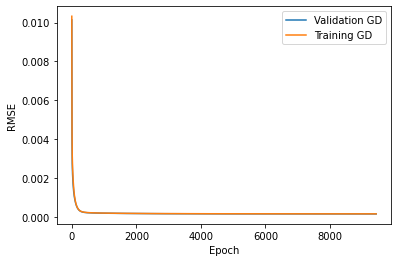

In [ ]:
import time
import matplotlib.pyplot as plt
start_time = time.time() ## Records current time


# initialize W less than 0.001
W = (np.random.uniform(0, 0.001, size=X_train_std.shape[1])).reshape(1,-1) ### Inital weights
alpha = 0.01  ### Learning rate
rmse_val_array_gd=[]
rmse_train_array_gd=[]

while True:
  y_pred_val_gd= np.dot(X_val_std,W.T).reshape (-1,1)
  rmse_val_array_gd.append(rmse(y_pred_val_gd,y_val))

  y_pred_train_gd= np.dot(X_train_std,W.T).reshape (-1,1)
  rmse_train_array_gd.append(rmse(y_pred_train_gd,y_train))

  # if the last val RMSE converged based on criteria above, break
  if rmse_val_array_gd[-1] <= 1.001 * direct_solution_val_rmse:
    break

  gradient = (1/len(y_pred_train_gd) * np.dot(X_train_std.T, y_pred_train_gd-y_train.reshape(-1,1))).reshape(1,-1)

  W = W - alpha * gradient ### weight update

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

plt.plot(rmse_val_array_gd, label="Validation GD")
plt.plot(rmse_train_array_gd, label="Training GD")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(loc="upper right")
plt.show()



Final Weights after training for batch size (that converged):  64  are:  [[-8.69424883e-04  1.90261695e-04  3.74697657e-06 -1.30770193e-04
   4.04096088e-05  2.41052851e-04 -8.65295791e-05  2.50645016e-04
  -2.58899004e-06  2.84326419e-05  1.52803785e-05 -8.76430130e-05
  -7.54084155e-05  5.56507349e-05 -5.07006347e-05 -2.43551959e-04
  -2.05287398e-04  5.00460929e-04 -2.37629090e-04  4.60479753e-05
  -3.68907783e-04  2.09333678e-04  1.91378439e-04  1.96026854e-04
   1.23713892e-04  2.93320186e-07 -9.68773089e-07  6.19128093e-06
  -1.73223727e-05  1.30544252e-05 -9.30349159e-05 -3.95524176e-06
  -3.91869119e-05  7.65015114e-06  2.39025251e-05  2.45342610e-05
  -1.49912440e-06 -2.03905381e-06 -5.03591421e-07 -1.28010967e-05
  -3.68524603e-04]]
Final Weights after training for batch size (that converged):  128  are:  [[-8.70954368e-04  2.35452853e-04  7.04860854e-06 -1.29177191e-04
   3.48674424e-05  2.97190988e-04 -8.56917623e-05  2.47666241e-04
  -7.63771812e-06  3.00076698e-05  1.6692

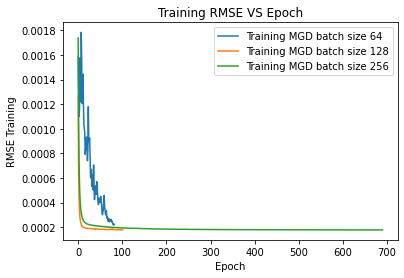

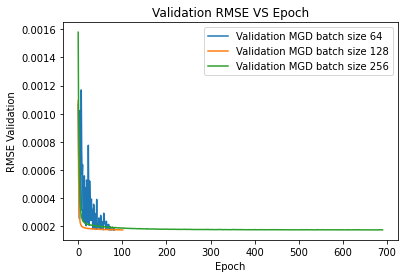

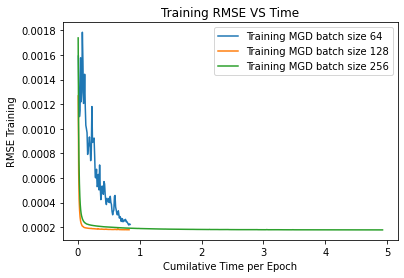

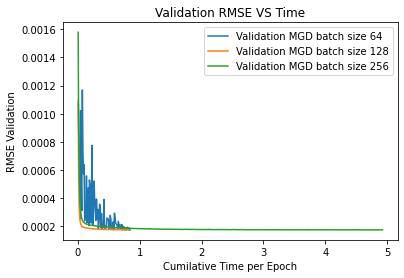

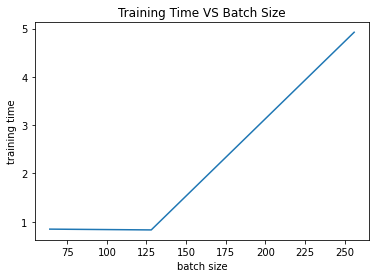

In [ ]:

def split_to_batches(dataset, batch_size):
  return [dataset[index:index + batch_size] for index in range(0, len(dataset), batch_size)]

def mini_batch(X_train_std, X_val_std, y_train, y_val, batch_size, alpha, ct):

  # initialize W less than 0.001
  W = (np.random.uniform(0, 0.001, size=X_train_std.shape[1])).reshape(1,-1) ### Inital weights

  rmse_val_array_mgd=[]

  rmse_train_array_mgd=[]

  time_per_epoch =[]

  start_time = time.time() ## Records current time
  didnotconverge=True

  while didnotconverge:

    #shuffle dataset
    shuffle_training_set = np.random.permutation(np.c_[X_train_std, y_train])

    #split to batches
    shuffle_training_set_batches = split_to_batches(shuffle_training_set,batch_size)

    # X_train_std= shuffle_training_set[:,:-1]
    # X_train_std_batches= split_to_batches(X_train_std,batch_size)

    # y_train= shuffle_training_set[:,-1]
    # y_train_batches= split_to_batches(y_train,batch_size)

    for batch in shuffle_training_set_batches:
      X_train_std_batch= batch[:,:-1]
      y_train_batch=batch[:,-1].reshape(-1,1)

      y_pred_train_mgd_batch= np.dot(X_train_std_batch,W.T).reshape (-1,1)
      gradient = (1/len(y_pred_train_mgd_batch) * np.dot(X_train_std_batch.T, y_pred_train_mgd_batch-y_train_batch.reshape(-1,1))).reshape(1,-1)
      W = W - alpha * gradient ### weight update


    y_pred_val_mgd= np.dot(X_val_std,W.T).reshape (-1,1)
    y_pred_train_mgd= np.dot(X_train_std,W.T).reshape (-1,1)

    #CONVERGENCE CHECK, if not converging do not append the RMSE arrays for validation and validation

    #check if the rmse is growing by checking if it is more than 2x the previous epoch for val data for 3 times in a row
    if len(rmse_val_array_mgd)>2 and rmse(y_pred_val_mgd,y_val) > rmse_val_array_mgd[-1]*2 and rmse_val_array_mgd[-1] >  rmse_val_array_mgd[-2]*2 and rmse_val_array_mgd[-2] > rmse_val_array_mgd[-3]*2:
      break

    #check if the rmse is growing by checking if it is more than 2x the previous epoch for train data for 3 times in a row
    if len(rmse_train_array_mgd)>2 and rmse(y_pred_train_mgd,y_train) > rmse_train_array_mgd[-1]*2 and rmse_train_array_mgd[-1]  > rmse_train_array_mgd[-2]*2 and rmse_train_array_mgd[-2] > rmse_train_array_mgd[-3]*2:
      break

    rmse_val_array_mgd.append(rmse(y_pred_val_mgd,y_val))
    rmse_train_array_mgd.append(rmse(y_pred_train_mgd,y_train))

    time_per_epoch.append(time.time() - start_time)

    # if the last val RMSE converged based on criteria above, break
    if rmse_val_array_mgd[-1] <= ct:
      didnotconverge=False



  return W, rmse_train_array_mgd, rmse_val_array_mgd,time_per_epoch, didnotconverge


num_batch = 6

W_mgd=[0] * num_batch
rmse_val_array_mgd = [0] * num_batch
rmse_train_array_mgd = [0] * num_batch
time_per_epoch =[0] * num_batch
didnotconverge =[0] * num_batch
batch_size =[0] * num_batch

# run the mini batch function for count of num_batch each with batch size in the power of 2
for j in range(num_batch):
  batch_size[j] = 2**(j+3)

  W_mgd[j], rmse_train_array_mgd[j], rmse_val_array_mgd[j],time_per_epoch[j], didnotconverge[j] = mini_batch(X_train_std, X_val_std, y_train, y_val, batch_size[j], 0.01, (1.001 * direct_solution_val_rmse))


#if the batch size converged, print the final weights and plot the RMSE training plot vs epoch
#as recommended by TA on piazza, splotting the RMSE traing and validation to 2 plots
for q in range(num_batch):
  if didnotconverge[q] == False:
    print("Final Weights after training for batch size (that converged): ", batch_size[q], " are: ", W_mgd[q])

    #plot RMSE plot vs epoch
    plt.plot(rmse_train_array_mgd[q], label="Training MGD batch size %i" %batch_size[q] )
    plt.xlabel("Epoch")
    plt.ylabel("RMSE Training")
    plt.legend(loc="upper right")
    plt.title("Training RMSE VS Epoch")

plt.show()

#as recommended by TA on piazza, splotting the RMSE traing and validation to 2 plots
for q in range(num_batch):
  if didnotconverge[q] == False:
    #plot RMSE plot vs epoch
    plt.plot(rmse_val_array_mgd[q], label="Validation MGD batch size %i" %batch_size[q] )
    plt.xlabel("Epoch")
    plt.ylabel("RMSE Validation")
    plt.legend(loc="upper right")
    plt.title("Validation RMSE VS Epoch")

plt.show()

#as recommended by TA on piazza, splotting the RMSE traing and validation to 2 plots
for q in range(num_batch):
  if didnotconverge[q] == False:
    #plot RMSE plot vs time
    plt.plot(time_per_epoch[q],rmse_train_array_mgd[q], label="Training MGD batch size %i" %batch_size[q])
    plt.xlabel("Cumilative Time per Epoch")
    plt.ylabel("RMSE Training")
    plt.legend(loc="upper right")
    plt.title("Training RMSE VS Time")

plt.show()

#as recommended by TA on piazza, splotting the RMSE traing and validation to 2 plots
for q in range(num_batch):
  if didnotconverge[q] == False:
    #plot RMSE plot vs time
    plt.plot(time_per_epoch[q],rmse_val_array_mgd[q], label="Validation MGD batch size %i" %batch_size[q])
    plt.xlabel("Cumilative Time per Epoch")
    plt.ylabel("RMSE Validation")
    plt.legend(loc="upper right")
    plt.title("Validation RMSE VS Time")

plt.show()


# prepare data for the training time vs time plot
plot_time = []
remove_batch=[]
for q in range(num_batch):
  if didnotconverge[q] == False:
    plot_time.append(time_per_epoch[q][-1])
  else:
    remove_batch.append(batch_size[q])

#remove all the batches that did not converge

for remove in remove_batch:
  batch_size.remove(remove)

#plot training time plot vs time
plt.plot(batch_size,plot_time)
plt.xlabel("batch size")
plt.ylabel("training time")
plt.title("Training Time VS Batch Size")
plt.show()





In [ ]:



# traing on training dataset using 500 epochs andbatch size 128 and momentum =0

def mini_batch_part6(X_train_std, X_val_std, y_train, y_val, batch_size, alpha, beta):

  # initialize W less than 0.001
  W = (np.random.uniform(0, 0.001, size=X_train_std.shape[1])).reshape(1,-1) ### Inital weights

  rmse_val_array_mgd=[]

  rmse_train_array_mgd=[]

  time_per_epoch =[]

  start_time = time.time() ## Records current time

  for epoch in range(0,500):

    #shuffle dataset
    shuffle_training_set = np.random.permutation(np.c_[X_train_std, y_train])

    #split to batches
    shuffle_training_set_batches = split_to_batches(shuffle_training_set,batch_size)

    # X_train_std= shuffle_training_set[:,:-1]
    # X_train_std_batches= split_to_batches(X_train_std,batch_size)

    # y_train= shuffle_training_set[:,-1]
    # y_train_batches= split_to_batches(y_train,batch_size)
    gradient = [0]
    for batch in shuffle_training_set_batches:
      X_train_std_batch= batch[:,:-1]
      y_train_batch=batch[:,-1].reshape(-1,1)

      y_pred_train_mgd_batch= np.dot(X_train_std_batch,W.T).reshape (-1,1)
      gradient_current = (1/len(y_pred_train_mgd_batch) * np.dot(X_train_std_batch.T, y_pred_train_mgd_batch-y_train_batch.reshape(-1,1))).reshape(1,-1)

      gradient.append((beta * gradient[-1]) + ((1-beta)*gradient_current))

      W = W - alpha * gradient[-1] ### weight update


    y_pred_val_mgd= np.dot(X_val_std,W.T).reshape (-1,1)
    y_pred_train_mgd= np.dot(X_train_std,W.T).reshape (-1,1)


    rmse_val_array_mgd.append(rmse(y_pred_val_mgd,y_val))
    rmse_train_array_mgd.append(rmse(y_pred_train_mgd,y_train))

    time_per_epoch.append(time.time() - start_time)

  return W, rmse_train_array_mgd, rmse_val_array_mgd,time_per_epoch



W_p6, rmse_train_array_p6, rmse_val_array_p6,time_per_epoch_p6 = mini_batch_part6(X_train_std, X_val_std, y_train, y_val, 128, 0.01, 0)

# use weights from training set to calculate test predicted values
y_pred_test_p6= np.dot(X_test_std,W_p6.T).reshape (-1,1)
rmse_test_p6= rmse(y_pred_test_p6,y_test)

print("rmse_test is: ", rmse_test_p6)


rmse_test is:  0.00016710152212529023
